<a href="https://colab.research.google.com/github/BhanuTeja143/AI/blob/main/dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
print('python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
scipy: 1.11.4
Numpy: 1.25.2
Matplotlib: 3.7.1
Pandas: 2.0.3
Sklearn: 1.2.2


In [35]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [4]:
#loading the data
from google.colab import files
uploaded =files.upload()

Saving iris.csv to iris.csv


In [60]:
names =['sepal-length','sepal-width','petal-length','petal-width','Species']
data=pd.read_csv('iris.csv')

In [61]:
print(data.shape)

(150, 5)


In [62]:
print(data.head(20))

    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [63]:
print(data.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [64]:
print(data.groupby('Species').size())

Species
setosa        50
versicolor    50
virginica     50
dtype: int64


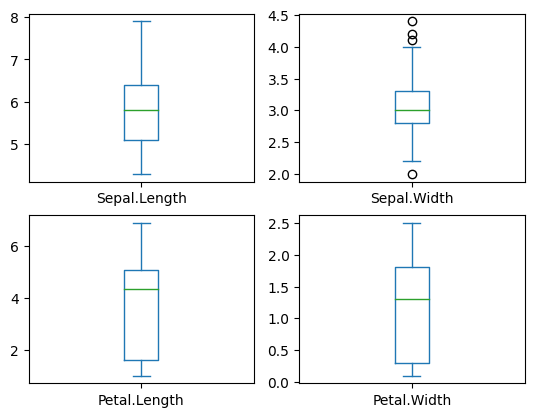

In [65]:
data.plot(kind='box' , subplots=True, layout=(2,2), sharex=False,sharey=False)
plt.show()

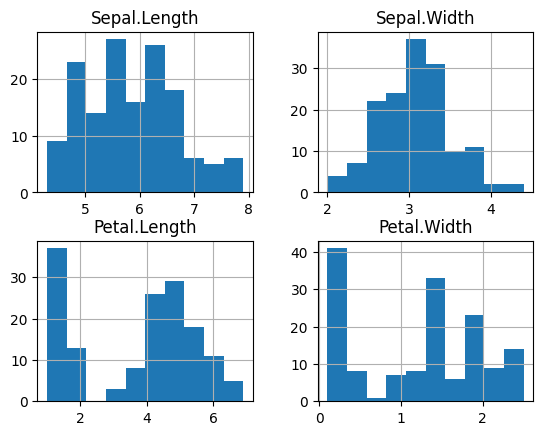

In [23]:
data.hist()
plt.show()

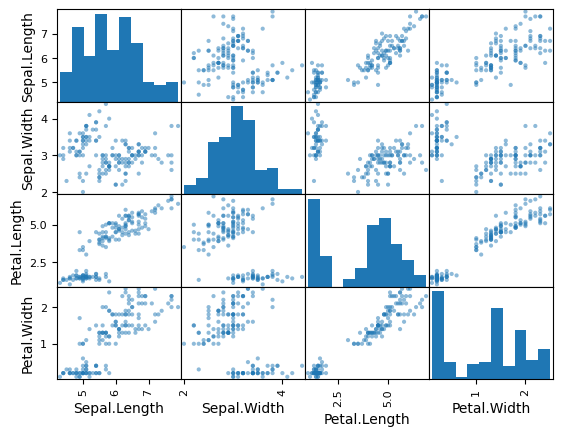

In [27]:
# multivariate plots
scatter_matrix(data)
plt.show()

In [29]:
#creating a validation set
#splitting dataset
array = data.values
x =array[: ,0:4]
y =array[: , 4]
x_train,x_validation, y_train, y_validation =train_test_split(x, y, test_size=0.2, random_state=1)

In [32]:
#Logisti regression
#Linear discriminamt Analysis
#k-nearest neighbors
#Classification and regression trees
#Guassian Navie Bayes
#svm
#building models
models=[]
models.append(('LR',LogisticRegression(solver='liblinear' , multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('NB' , GaussianNB()))
models.append(("SVM", SVC(gamma= 'auto')))

In [76]:
#evaluate models
results =[]
names=[]

for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results= cross_val_score(model,x_train,y_train,cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name,cv_results.mean(), cv_results.std()))


LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


In [88]:
#make predictions
model=SVC(gamma='auto')
model.fit(x_train,y_train)
predictions=model.predict(x_validation)

In [90]:
#evaluate our predictions
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

